In [1]:
import joblib
a = joblib.load("/Users/orenkobo/Desktop/PhD/Aim3/narratives/milky_encoding/isc-tutorial/isc_tutorial/iscs_all.jbl")
a

array([[nan, nan, nan, ..., nan, nan, nan]])

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("spatial_isc_res_df.csv", index_col=False)
df

,df_type,cond,roi,subject_id,sentence_idx,pair_type,score_type,idx_pairs,score1,pval1,score2,pval2
0,orig,intact,reward,23,0,actual,correlation,"(nan, nan)",-0.044351,1.135460e-06,-0.031583,5.308360e-04
1,orig,intact,reward,23,0,baseline,correlation,"(30, 44)",-0.158025,4.026903e-68,-0.040000,1.140072e-05
2,orig,intact,reward,23,0,baseline,correlation,"(9, 64)",-0.249512,3.668884e-170,0.066100,3.945831e-13
3,orig,intact,reward,23,0,baseline,correlation,"(65, 17)",-0.304235,4.748265e-256,0.187097,3.268239e-95
4,orig,intact,reward,23,0,baseline,correlation,"(27, 24)",0.107405,3.311336e-32,0.147232,2.797331e-59
...,...,...,...,...,...,...,...,...,...,...,...,...
855355,pca20,scrambled,vision,131,65,baseline,distance,"(27, 63)",26.553930,NaN,0.130271,NaN
855356,pca20,scrambled,vision,131,65,baseline,distance,"(32, 57)",18.992884,NaN,0.337021,NaN
855357,pca20,scrambled,vision,131,65,baseline,distance,"(29, 5)",28.552026,NaN,0.892287,NaN
855358,pca20,scrambled,vision,131,65,baseline,distance,"(64, 38)",37.604185,NaN,0.268416,NaN


In [55]:
df[df.pair_type=='baseline'].groupby(['cond','roi','subject_id','sentence_idx']).corr1.mean().values

array([ 0.01599707,  0.0544709 , -0.03639552, ...,  0.02519735,
        0.01736419, -0.01590325])

In [56]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

size = 1
fn = lambda obj: obj.loc[np.random.choice(obj.index, 1),:]
# v1 = df[df.pair_type=='baseline'].groupby(['cond','roi','subject_id','sentence_idx'], as_index=False).apply(fn).corr1
v1 = df[df.pair_type=='baseline'].groupby(['cond','roi','subject_id','sentence_idx']).corr1.mean().values
v2 = df[df.pair_type=='actual'].corr1

print(ttest_ind(v1,v2))
print(ttest_rel(v1,v2))

Ttest_indResult(statistic=-17.572681517637584, pvalue=4.723894687110973e-68)
Ttest_relResult(statistic=-17.5992211113453, pvalue=3.255976498607113e-67)


,,cond,roi,subject_id,sentence_idx,pair_type,corr1,pval1,corr2,pval2,corr
0,26,intact,reward,23,0,baseline,0.002648,7.715171e-01,-0.002817,7.573984e-01,0.002648
1,52,intact,reward,23,1,baseline,0.052763,7.007122e-09,0.056401,5.990319e-10,0.052763
2,81,intact,reward,23,2,baseline,0.055807,9.047663e-10,0.057239,3.326145e-10,0.055807
3,115,intact,reward,23,3,baseline,0.059565,6.209468e-11,0.060959,2.202924e-11,0.059565
4,145,intact,reward,23,4,baseline,-0.090797,1.888561e-23,-0.091480,8.814818e-24,-0.090797
...,...,...,...,...,...,...,...,...,...,...,...
4747,170906,scrambled,vision,131,61,baseline,0.013295,5.696867e-01,0.047794,4.086548e-02,0.013295
4748,170948,scrambled,vision,131,62,baseline,-0.145490,3.985915e-10,-0.192272,1.047531e-16,-0.145490
4749,170988,scrambled,vision,131,63,baseline,0.183806,2.238530e-15,0.221981,7.094059e-22,0.183806
4750,171007,scrambled,vision,131,64,baseline,-0.046059,4.877150e-02,-0.025680,2.720832e-01,-0.046059


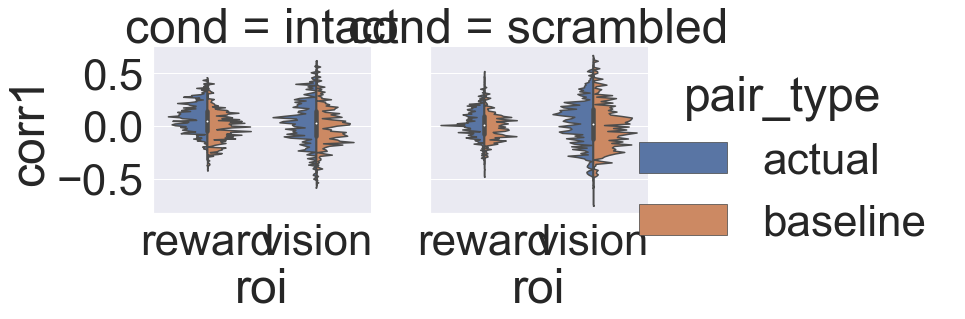

In [108]:
df_balanced = pd.concat([
      df[df.pair_type=='actual'][['cond','roi','subject_id','sentence_idx','corr1','pair_type']],
    df[df.pair_type=='baseline'].groupby(['cond','roi','subject_id','sentence_idx'], as_index=False).apply(fn).reset_index()[['cond','roi','subject_id','sentence_idx','pair_type','corr1']],
      #df[df.pair_type=='baseline'].groupby(['cond','roi','subject_id','sentence_idx','pair_type']).corr1.mean().reset_index(),

])

# sns.catplot(data=df_balanced, hue='pair_type', x='roi',col='cond', kind='box', y='corr1')
sns.catplot(data=df_balanced, hue='pair_type', x='roi',col='cond', kind='violin', y='corr1',bw=.005,  split=True)

In [102]:
df[df.pair_type=='baseline'].groupby(['cond','roi','subject_id','sentence_idx'], as_index=False).apply(fn).reset_index()[['cond','roi','subject_id','sentence_idx','pair_type']]

,cond,roi,subject_id,sentence_idx,pair_type
0,intact,reward,23,0,baseline
1,intact,reward,23,1,baseline
2,intact,reward,23,2,baseline
3,intact,reward,23,3,baseline
4,intact,reward,23,4,baseline
...,...,...,...,...,...
4747,scrambled,vision,131,61,baseline
4748,scrambled,vision,131,62,baseline
4749,scrambled,vision,131,63,baseline
4750,scrambled,vision,131,64,baseline


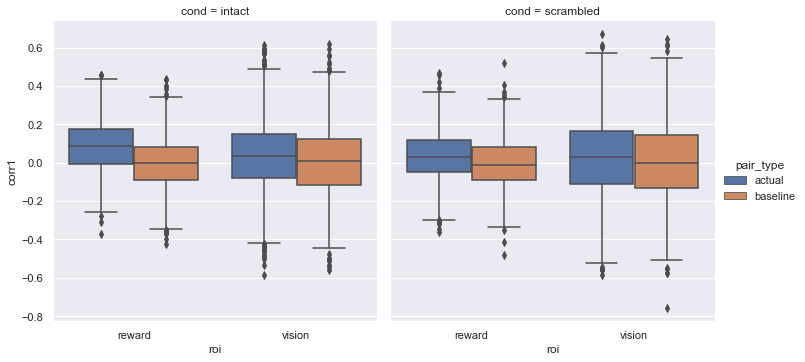

In [115]:
sns.set(font_scale=1) 
sns.catplot(data=df_balanced, hue='pair_type', x='roi',col='cond', kind='box', y='corr1')

In [100]:
df_balanced

,cond,roi,subject_id,sentence_idx,pair_type,corr1
"(0, 2)",intact,reward,23,0,baseline,NaN
"(1, 44)",intact,reward,23,1,baseline,NaN
"(2, 89)",intact,reward,23,2,baseline,NaN
"(3, 120)",intact,reward,23,3,baseline,NaN
"(4, 161)",intact,reward,23,4,baseline,NaN
...,...,...,...,...,...,...
170892,scrambled,vision,131,61,actual,-0.179836
170928,scrambled,vision,131,62,actual,0.202491
170964,scrambled,vision,131,63,actual,-0.002607
171000,scrambled,vision,131,64,actual,0.147482


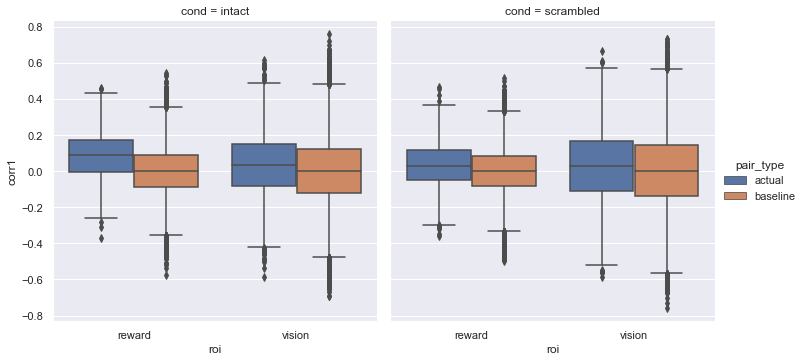

In [42]:
# df['corr'] = df.apply(lambda x : abs(x.corr1) if x.pair_type=='actual' and x.cond=='intact' and x.roi=='reward' else x.corr1, axis=1)
sns.set(font_scale=1) 

sns.catplot(data=df, hue='pair_type', x='roi',col='cond', kind='box', y='corr1')

In [87]:
sns.catplot(data=df_balanced, hue='pair_type', x='roi',col='cond', kind='box', y='corr1')

ValueError: Could not interpret input 'pair_type'

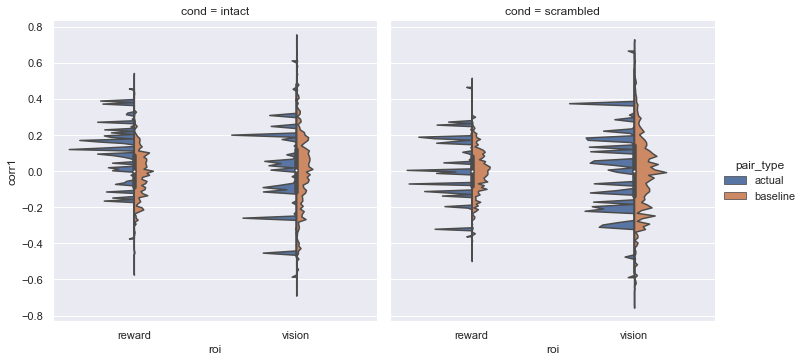

In [79]:
sns.catplot(data=df, hue='pair_type', x='roi',col='cond', kind='violin', y='corr1',bw=.0003,  split=True)

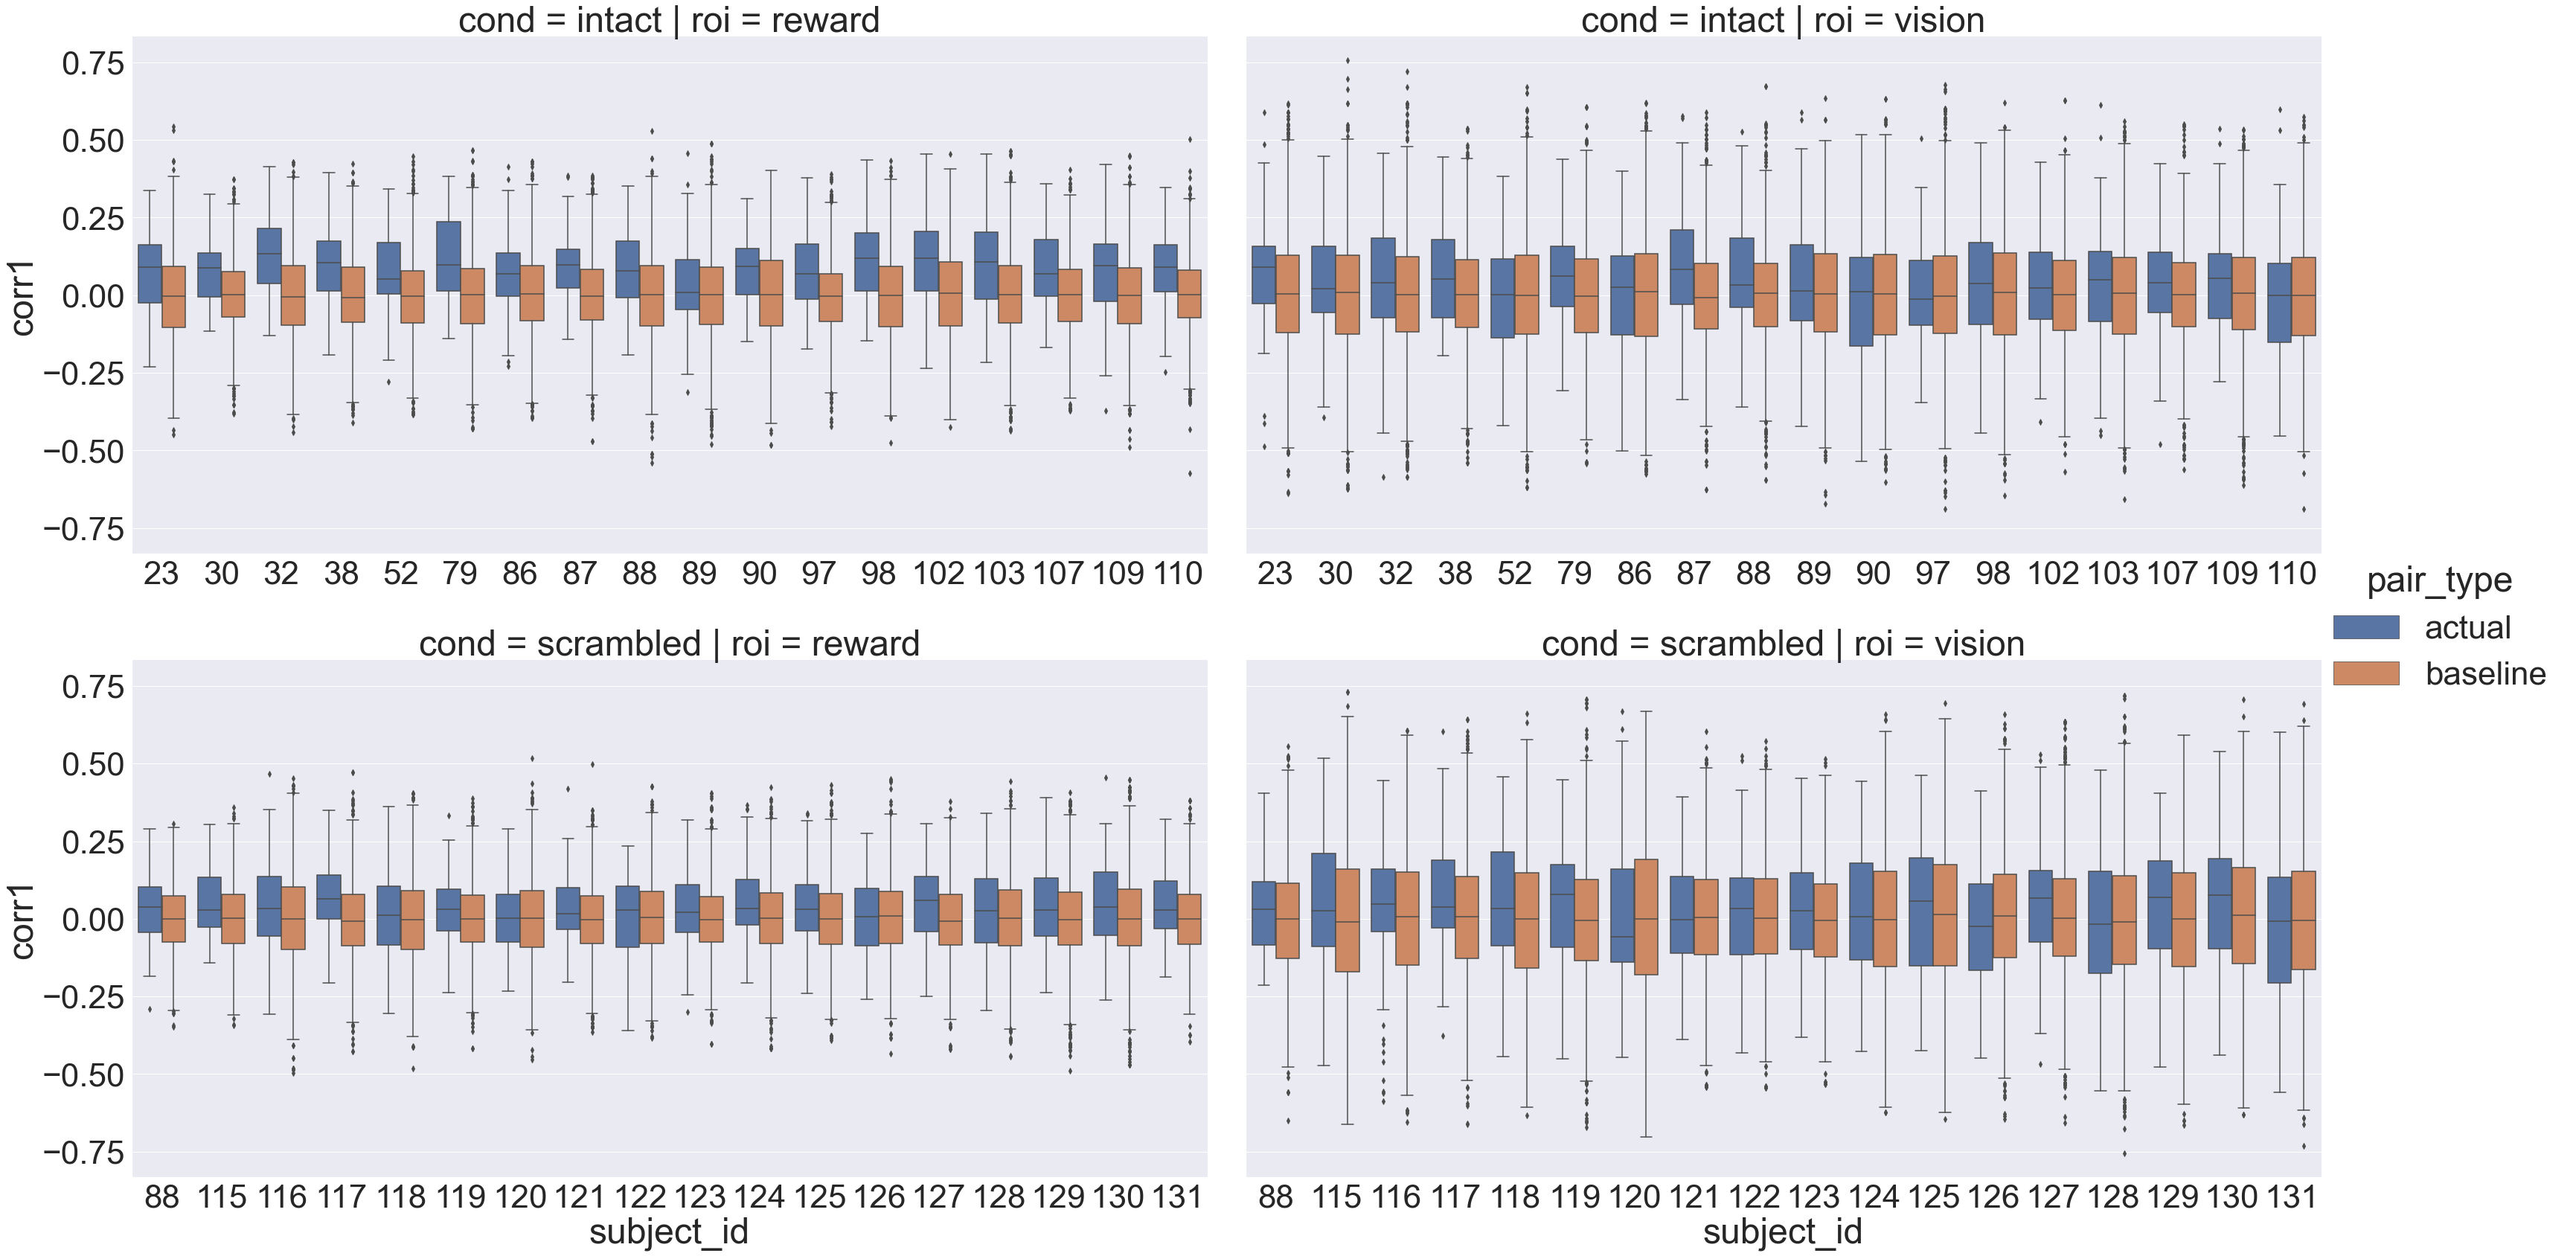

In [35]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(16,5))
h=12
sns.set(font_scale=4) 
sns.catplot(data=df, hue='pair_type', x='subject_id', row='cond', y='corr1', col='roi' , height=h, aspect=22/h,
                kind='box', sharex=False)
    # plt.title("per subject - reward")
plt.show()

# plt.figure(figsize=(16,5))
# sns.boxplot(data=df[df.roi=='vision'], hue='pair_type', x='subject_id', y='corr1')
# plt.title("per subject - vision")
# plt.show()
# sns.catplot(data=df, hue='pair_type', x='subject_id', row='roi', kind='box', y='corr1')

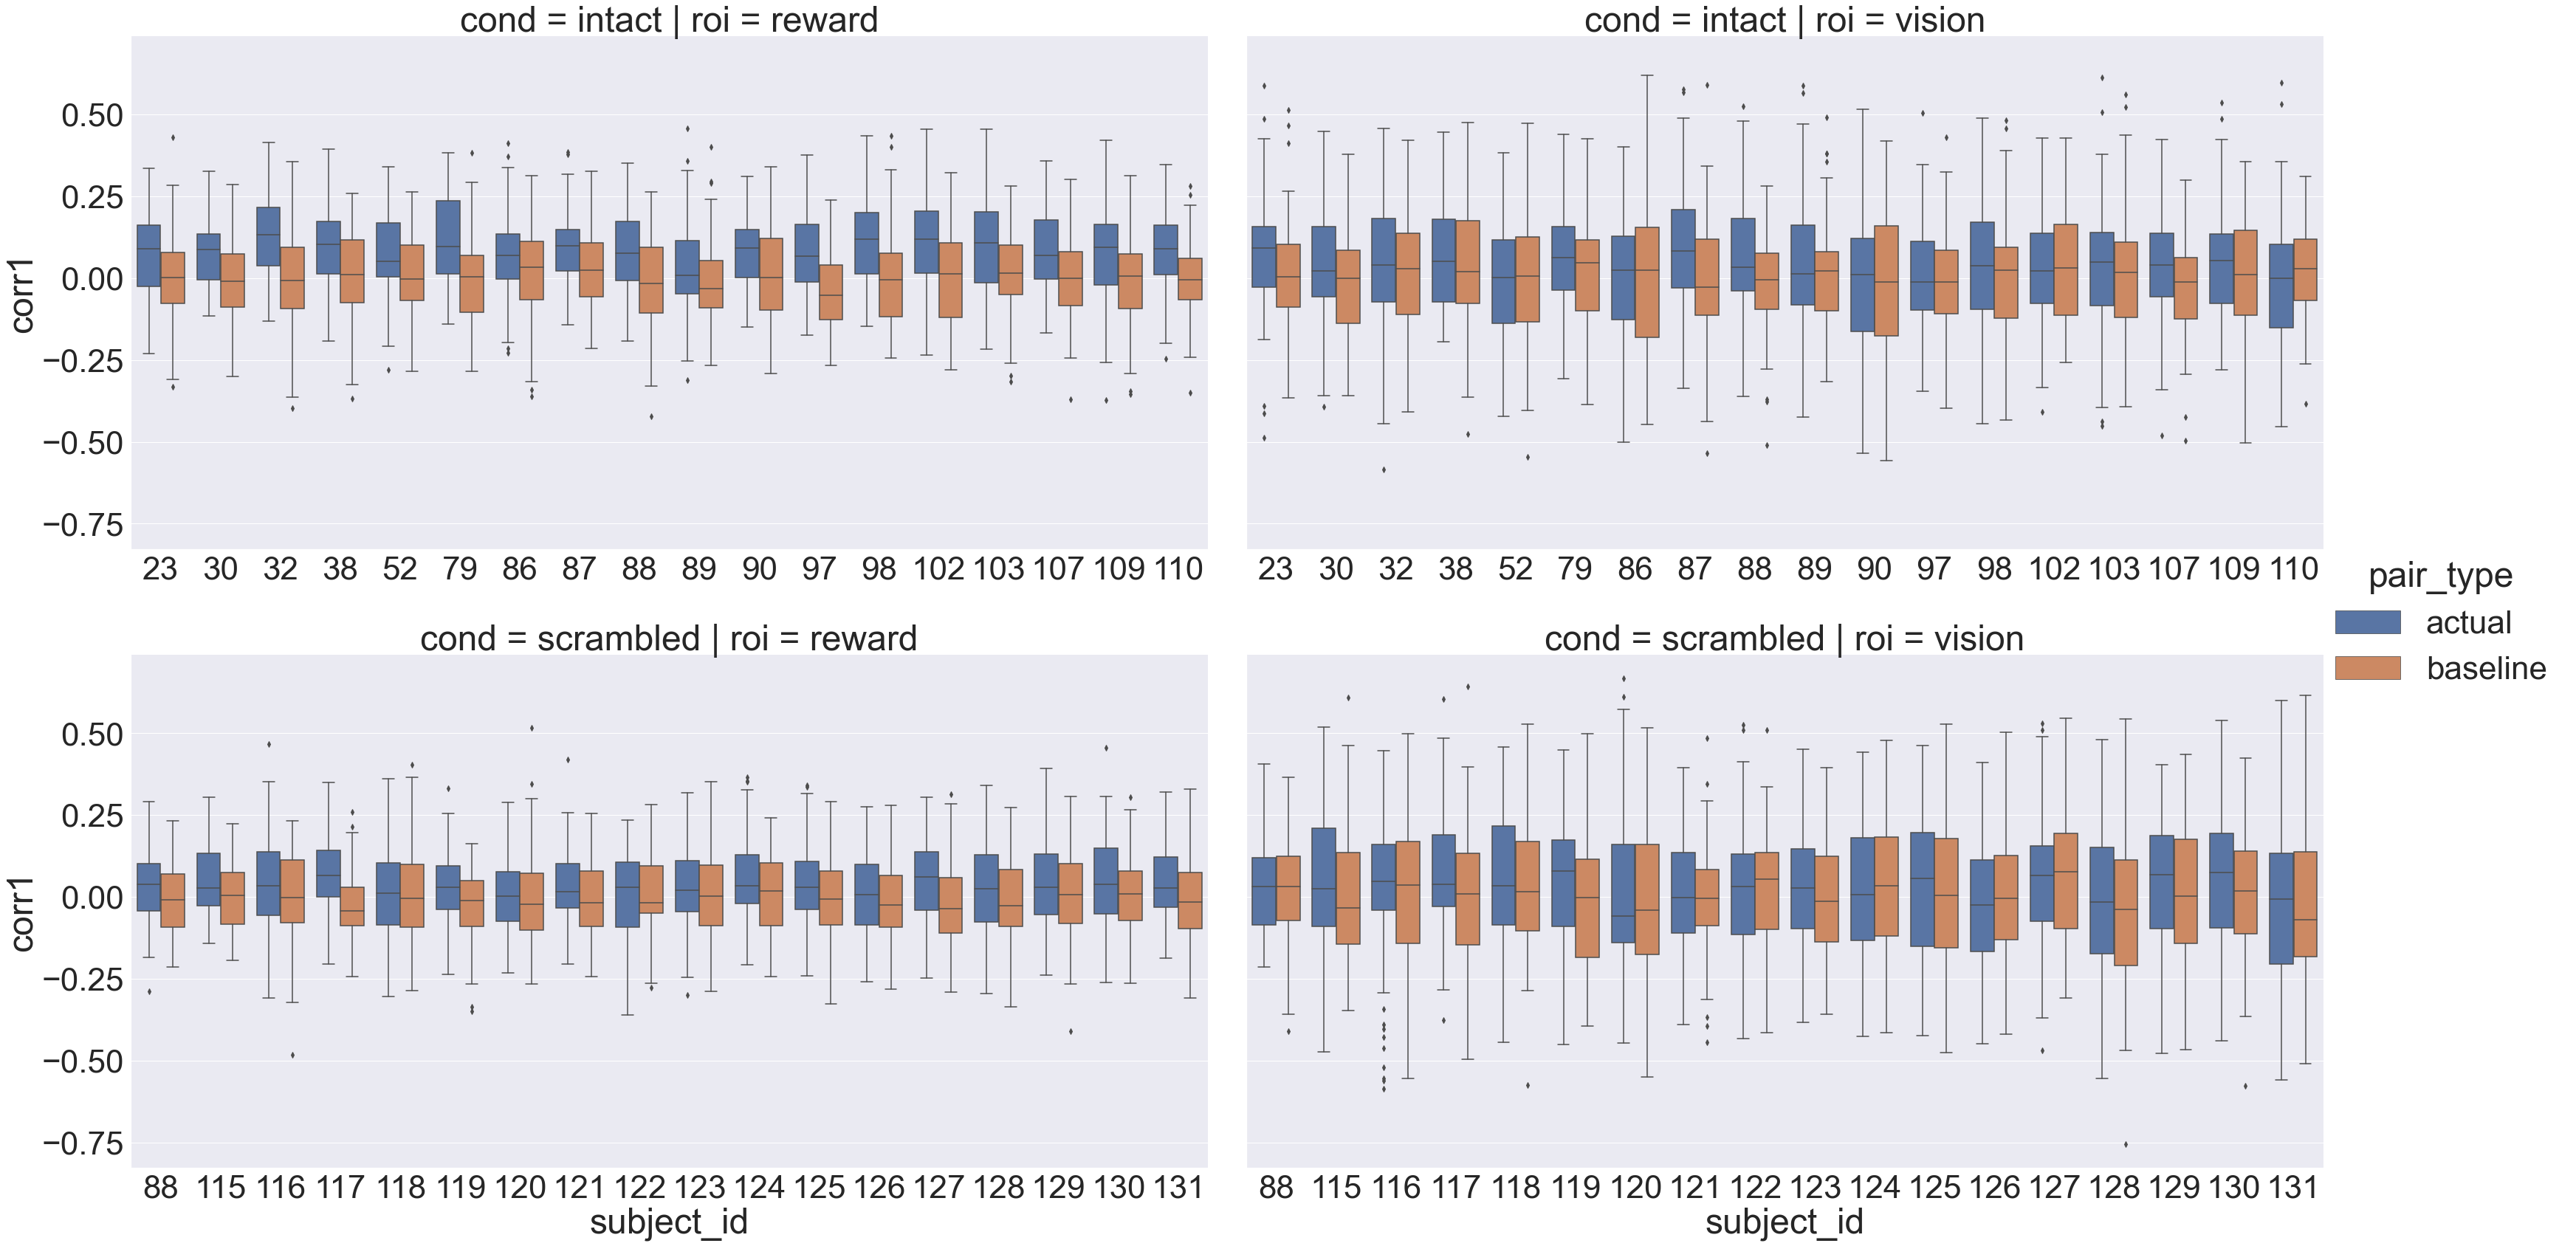

In [109]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(16,5))
h=12
sns.set(font_scale=4) 
sns.catplot(data=df_balanced, hue='pair_type', x='subject_id', row='cond', y='corr1', col='roi' , height=h, aspect=22/h,
                kind='box', sharex=False)
    # plt.title("per subject - reward")
plt.show()

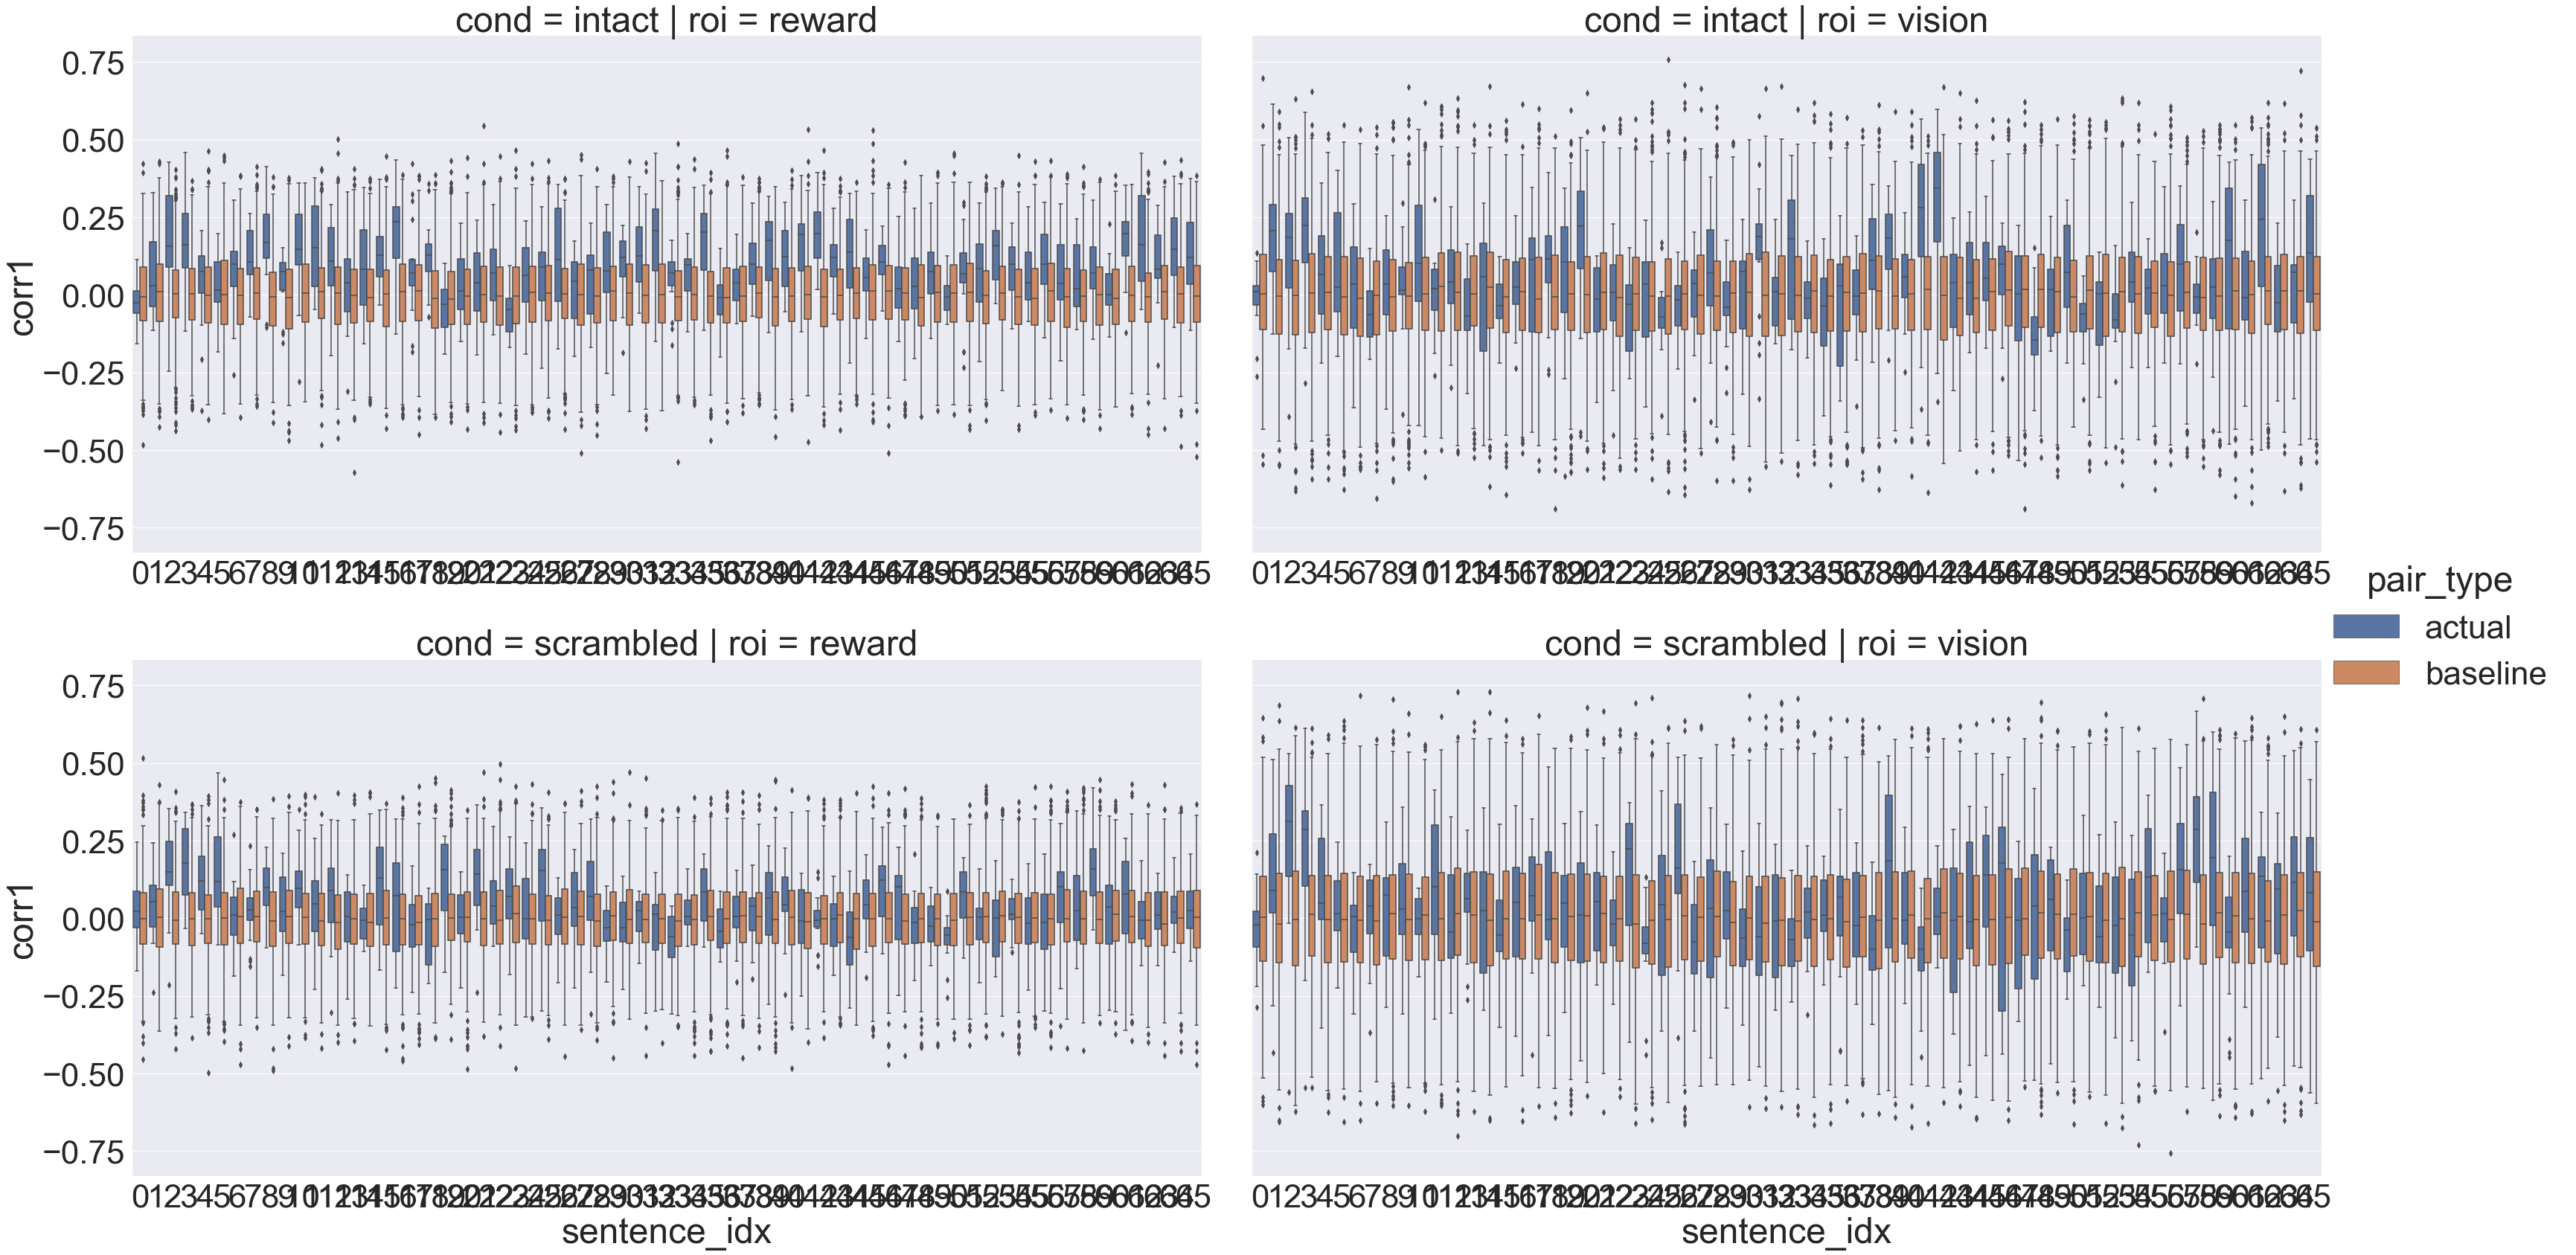

In [36]:
h=12
sns.set(font_scale=4) 
sns.catplot(data=df, hue='pair_type', x='sentence_idx', row='cond', y='corr1', col='roi' , height=h, aspect=22/h,
                kind='box', sharex=False)
    # plt.title("per subject - reward")
plt.show()

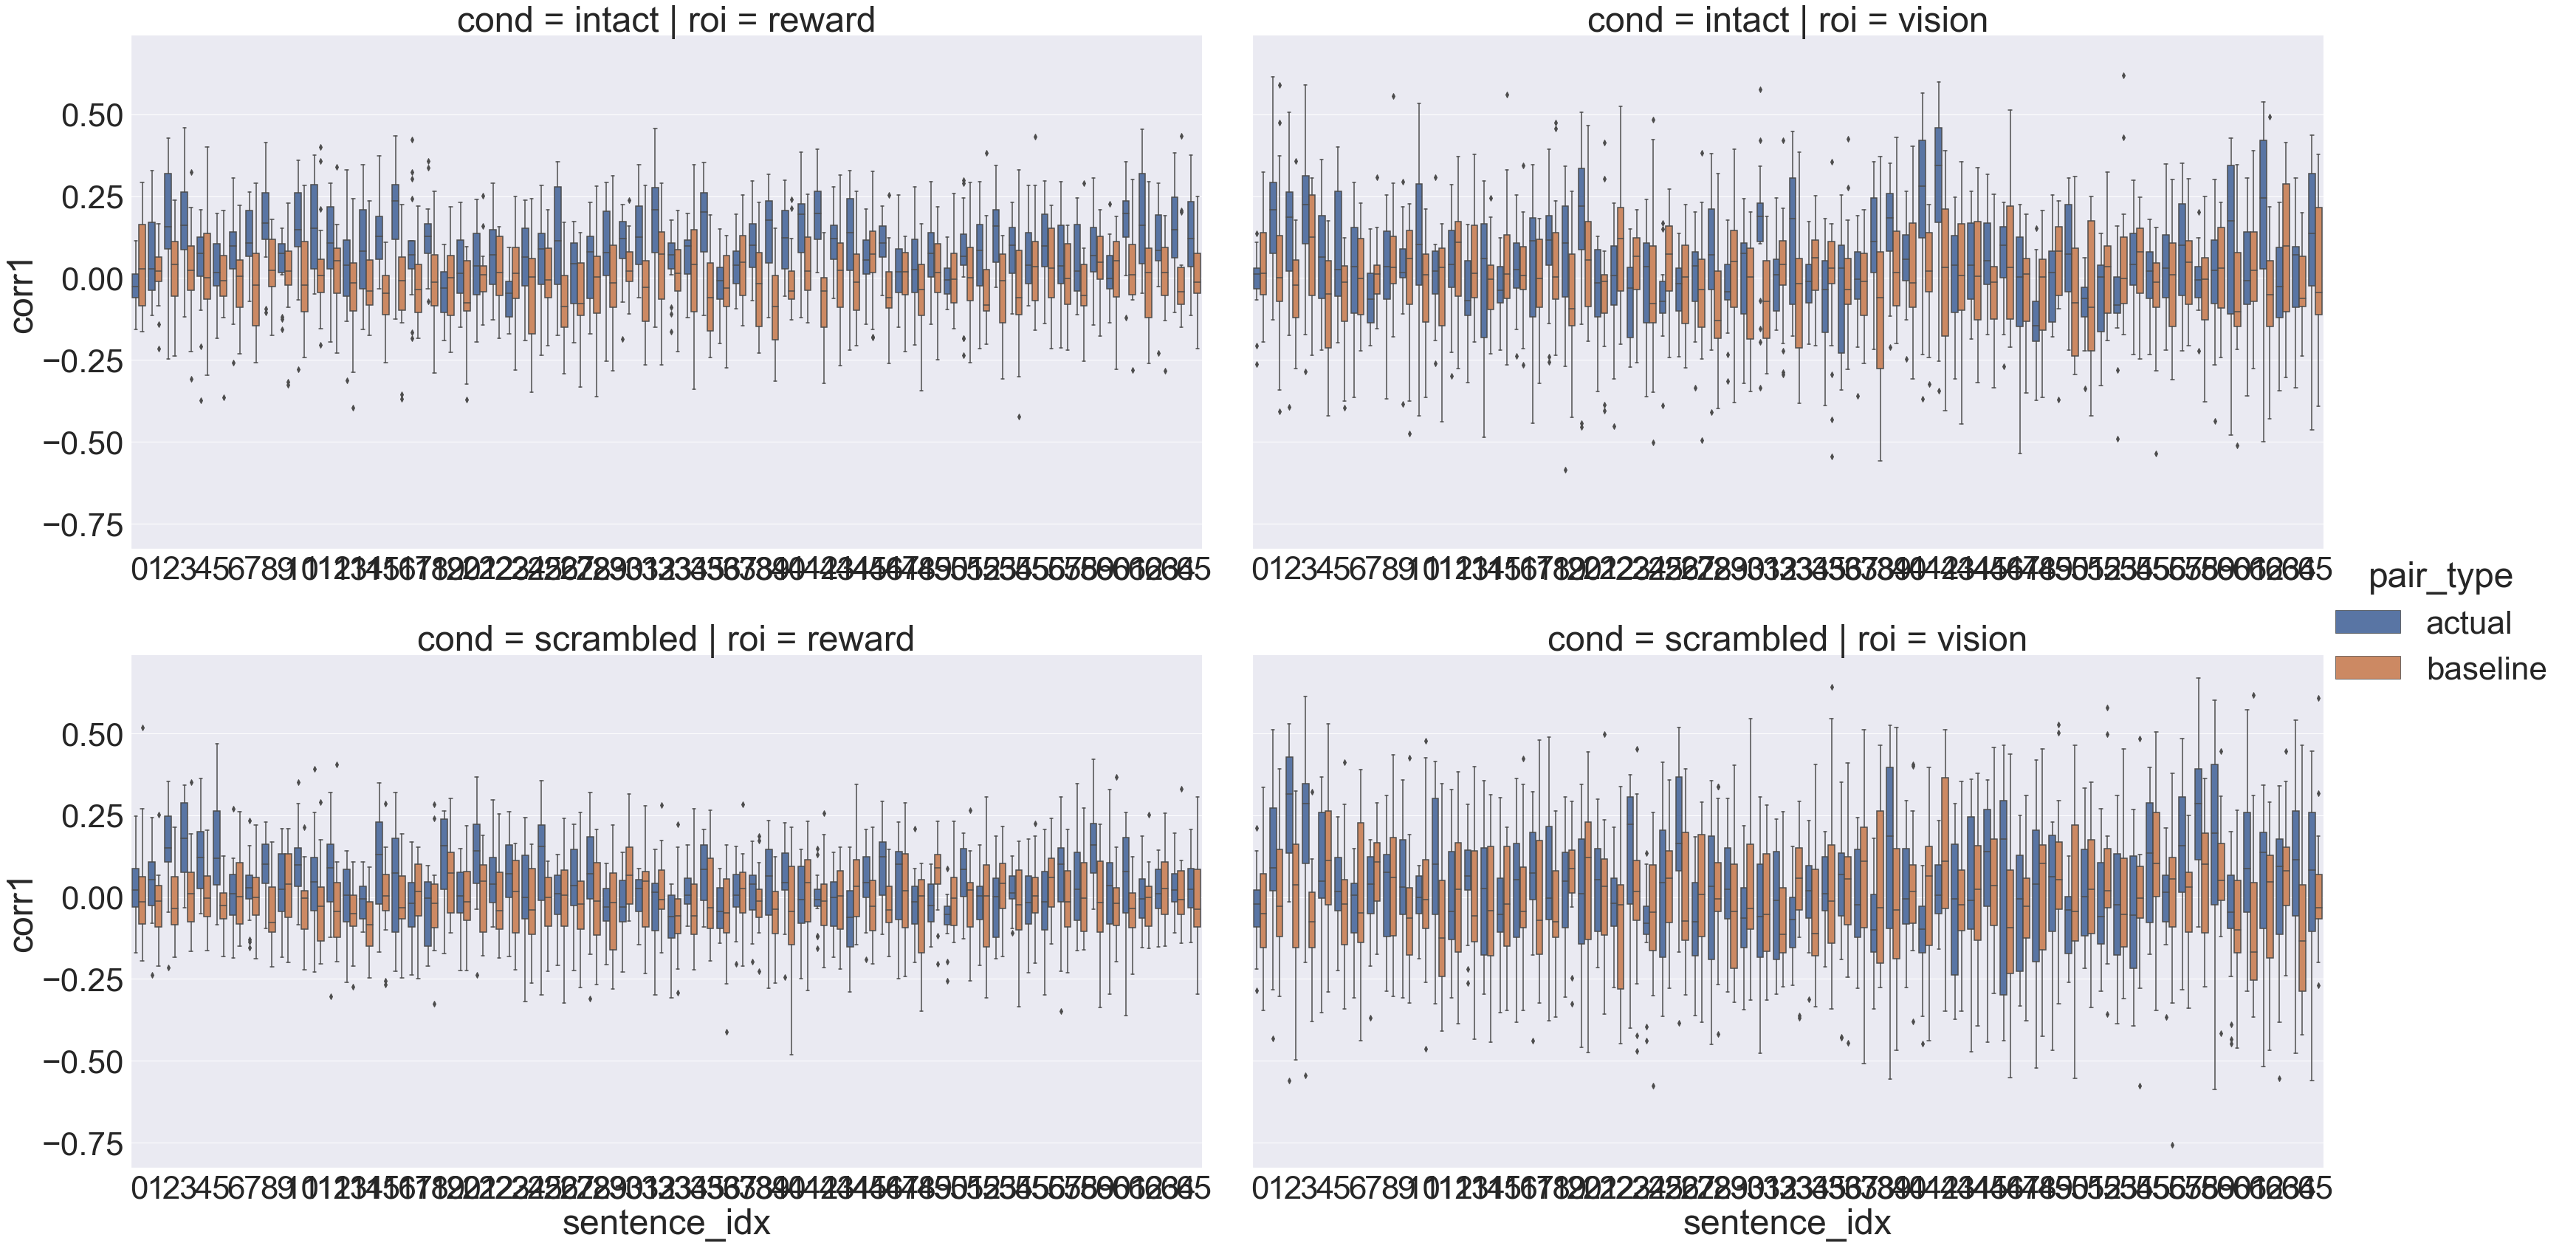

In [110]:
h=12
sns.set(font_scale=4) 
sns.catplot(data=df_balanced, hue='pair_type', x='sentence_idx', row='cond', y='corr1', col='roi' , height=h, aspect=22/h,
                kind='box', sharex=False)
    # plt.title("per subject - reward")
plt.show()